In [6]:
!pip install pyserial
!pip install ultralytics
!pip install requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00


In [8]:
!pip install ultralytics

from google.colab import drive
drive.mount('/content/drive')

print("Drive mounted!")

Mounted at /content/drive
Drive mounted!


In [9]:
from ultralytics import YOLO

# Path to your model in Drive
MODEL_PATH = "/content/drive/MyDrive/best_final_push.pt"

model = YOLO(MODEL_PATH)
print("Model loaded from:", MODEL_PATH)


Model loaded from: /content/drive/MyDrive/best_final_push.pt


Loading model...
Model loaded!
Watching folder for new images...

📸 New Image Detected: img_20251204_162823.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162823.jpg: 480x640 1 bad, 395.6ms
Speed: 7.5ms preprocess, 395.6ms inference, 36.0ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠ ERROR sending to ESP32


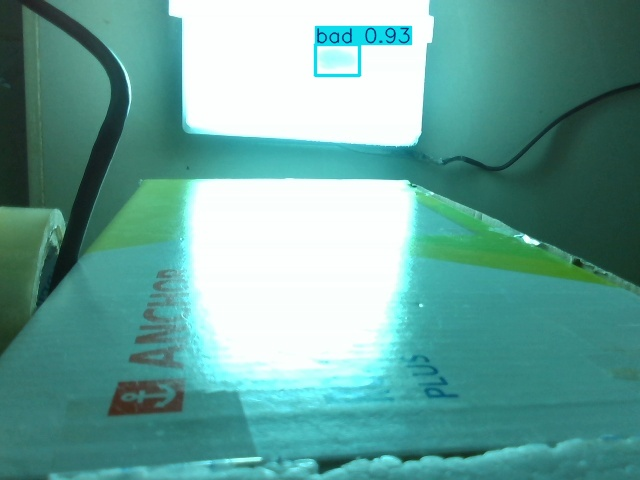


📸 New Image Detected: img_20251204_162832.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162832.jpg: 480x640 1 good, 1 bad, 173.0ms
Speed: 2.4ms preprocess, 173.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🟢 RESULT: GOOD COCOON
⚠ ERROR sending to ESP32


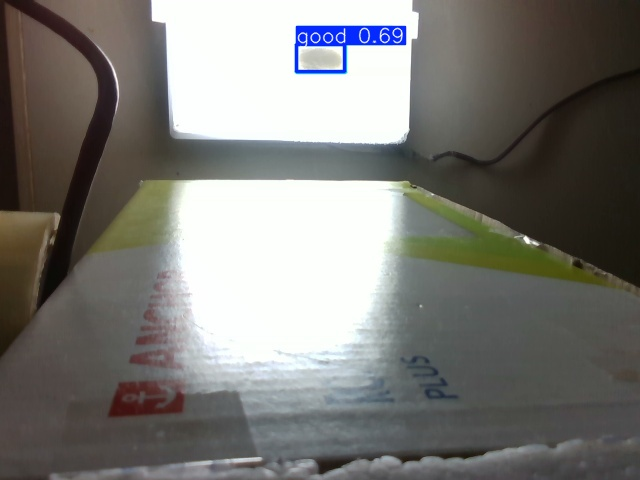


📸 New Image Detected: img_20251204_162840.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162840.jpg: 480x640 1 bad, 171.4ms
Speed: 2.4ms preprocess, 171.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠ ERROR sending to ESP32


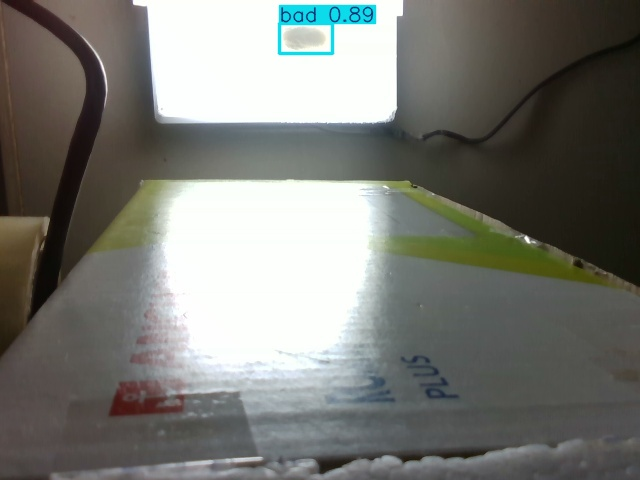


📸 New Image Detected: img_20251204_162848.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162848.jpg: 480x640 1 bad, 188.8ms
Speed: 2.4ms preprocess, 188.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠ ERROR sending to ESP32


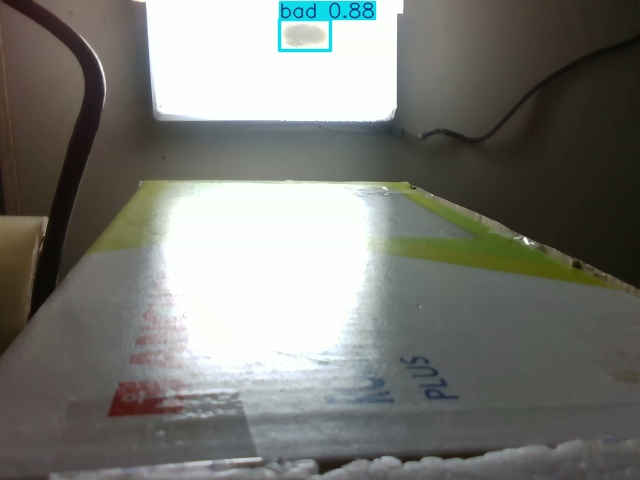


📸 New Image Detected: img_20251204_162856.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162856.jpg: 480x640 1 good, 1 bad, 169.2ms
Speed: 2.5ms preprocess, 169.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🟢 RESULT: GOOD COCOON
⚠ ERROR sending to ESP32


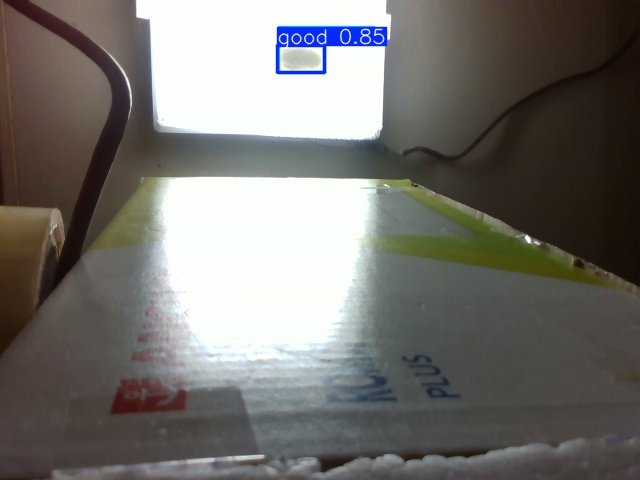


📸 New Image Detected: img_20251204_162906.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162906.jpg: 480x640 1 bad, 176.2ms
Speed: 2.2ms preprocess, 176.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠ ERROR sending to ESP32


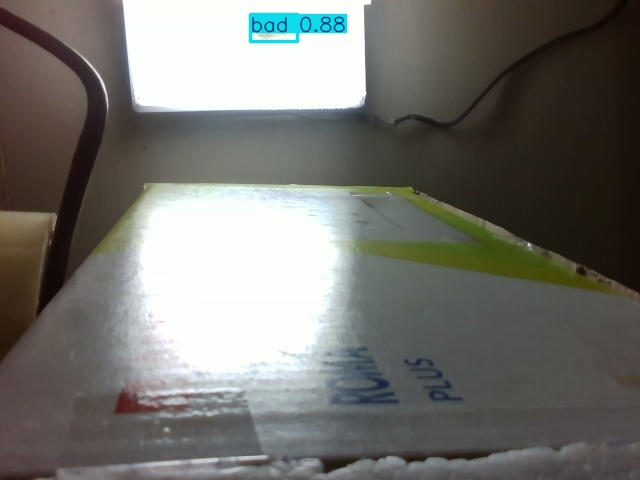


📸 New Image Detected: img_20251204_162914.jpg



KeyboardInterrupt: 

In [10]:
import os
import time
import requests
from ultralytics import YOLO
from IPython.display import display, Image

# --------------------------------------
# ESP32 IP (change this)
# --------------------------------------
ESP32_IP = "http://192.168.1.48"   # <--- CHANGE THIS IP from Serial Monitor

# --------------------------------------
# Paths
# --------------------------------------
model_path = "/content/drive/MyDrive/best_final_push.pt"
watch_folder = "/content/drive/MyDrive/CocoonImages"

# --------------------------------------
# Load model
# --------------------------------------
print("Loading model...")
model = YOLO(model_path)
print("Model loaded!")

# Keep track of processed files
processed = set()

print("Watching folder for new images...")

while True:
    files = sorted(os.listdir(watch_folder))

    for f in files:
        if f.lower().endswith((".jpg", ".jpeg", ".png")) and f not in processed:
            full_path = os.path.join(watch_folder, f)

            print(f"\n📸 New Image Detected: {f}")

            # Run inference
            results = model(full_path)
            pred = results[0]

            # Determine Good/Bad
            names = model.names
            detected_classes = [names[int(box.cls)] for box in pred.boxes]

            if "good" in detected_classes:
                print("🟢 RESULT: GOOD COCOON")

                # ---- SERVO MOVE ----
                try:
                    requests.get(f"{ESP32_IP}/good")
                    print("Servo moved: GOOD (45°)")
                except:
                    print("⚠ ERROR sending to ESP32")

            else:
                print("🔴 RESULT: BAD COCOON")

                # ---- SERVO MOVE ----
                try:
                    requests.get(f"{ESP32_IP}/bad")
                    print("Servo moved: BAD (135°)")
                except:
                    print("⚠ ERROR sending to ESP32")

            # Save annotated result
            out_path = "/content/output_" + f
            pred.plot(save=True, filename=out_path)

            # Show image
            display(Image(filename=out_path))

            processed.add(f)

    time.sleep(2)


Loading model...
Model loaded!
Watching folder for new images...


📸 New Image Detected: img_20251204_162823.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162823.jpg: 480x640 1 bad, 195.6ms
Speed: 3.0ms preprocess, 195.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


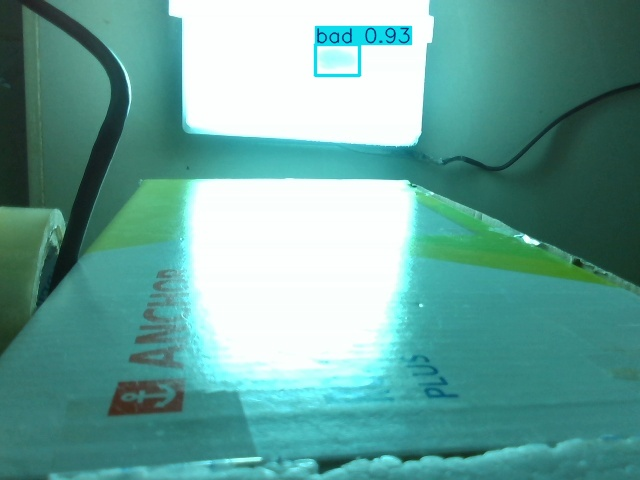


📸 New Image Detected: img_20251204_162832.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162832.jpg: 480x640 1 good, 1 bad, 193.6ms
Speed: 4.2ms preprocess, 193.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🟢 RESULT: GOOD COCOON
⚠️ Could not reach ESP32


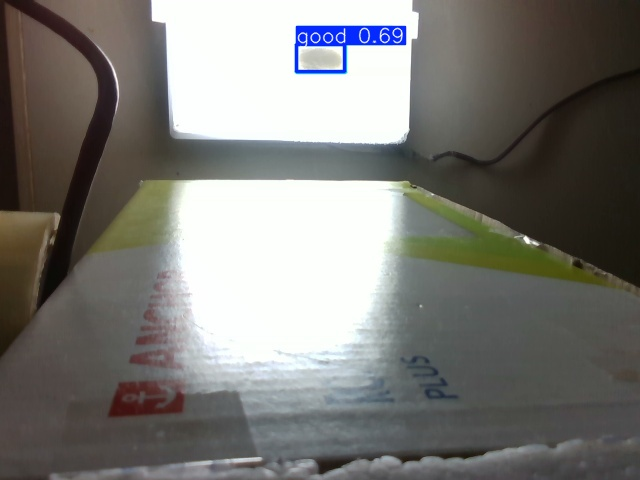


📸 New Image Detected: img_20251204_162840.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162840.jpg: 480x640 1 bad, 174.4ms
Speed: 2.5ms preprocess, 174.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


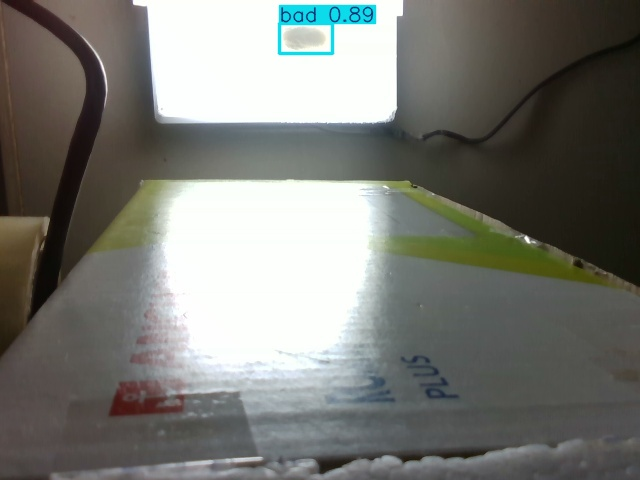


📸 New Image Detected: img_20251204_162848.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162848.jpg: 480x640 1 bad, 182.3ms
Speed: 5.7ms preprocess, 182.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


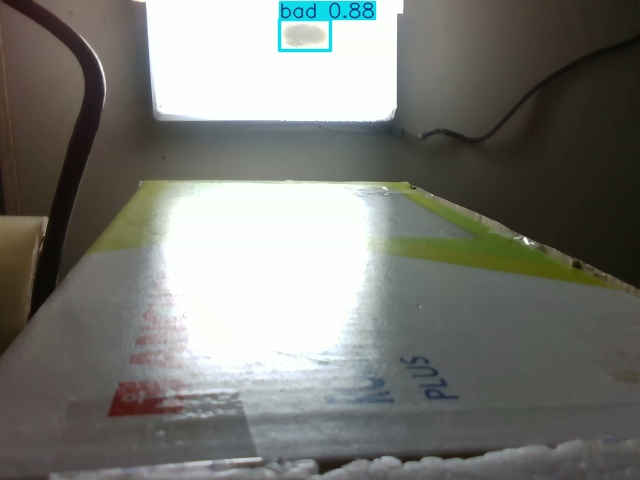


📸 New Image Detected: img_20251204_162856.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162856.jpg: 480x640 1 good, 1 bad, 177.2ms
Speed: 4.4ms preprocess, 177.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🟢 RESULT: GOOD COCOON
⚠️ Could not reach ESP32


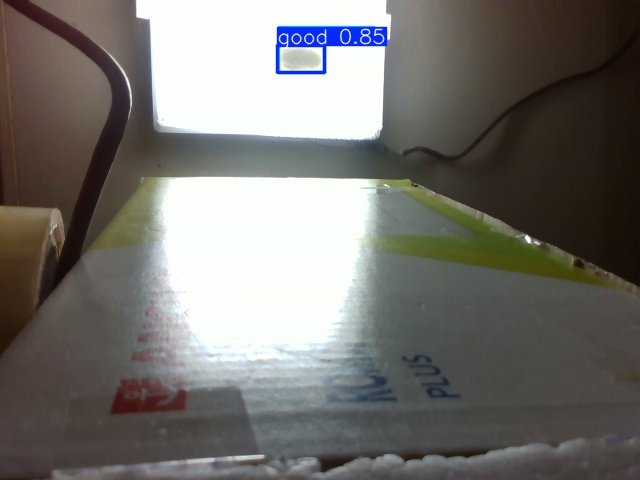


📸 New Image Detected: img_20251204_162906.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162906.jpg: 480x640 1 bad, 187.2ms
Speed: 2.7ms preprocess, 187.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


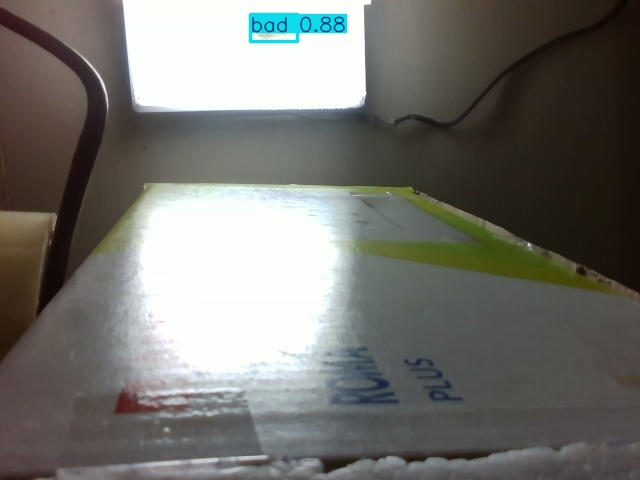


📸 New Image Detected: img_20251204_162914.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162914.jpg: 480x640 1 bad, 307.0ms
Speed: 2.5ms preprocess, 307.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


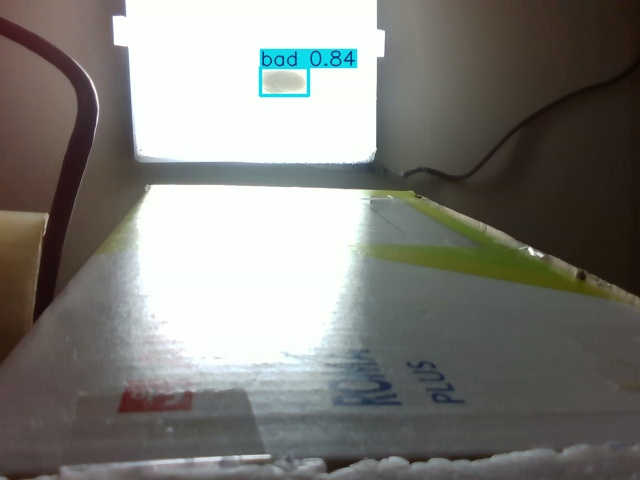


📸 New Image Detected: img_20251204_162922.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162922.jpg: 480x640 1 good, 1 bad, 310.5ms
Speed: 3.5ms preprocess, 310.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🟢 RESULT: GOOD COCOON
⚠️ Could not reach ESP32


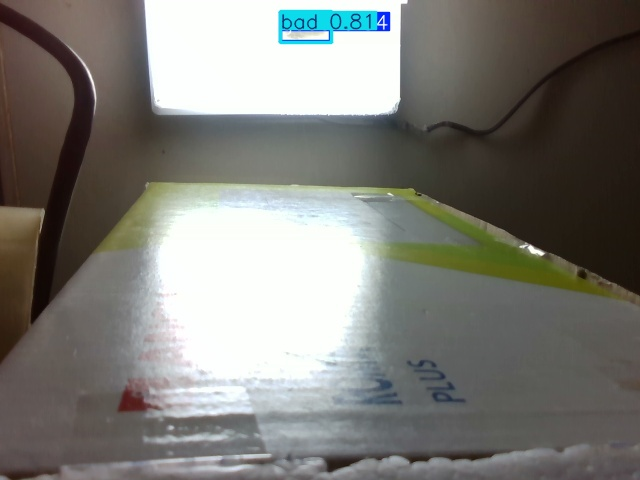


📸 New Image Detected: img_20251204_162931.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162931.jpg: 480x640 1 bad, 188.1ms
Speed: 4.6ms preprocess, 188.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


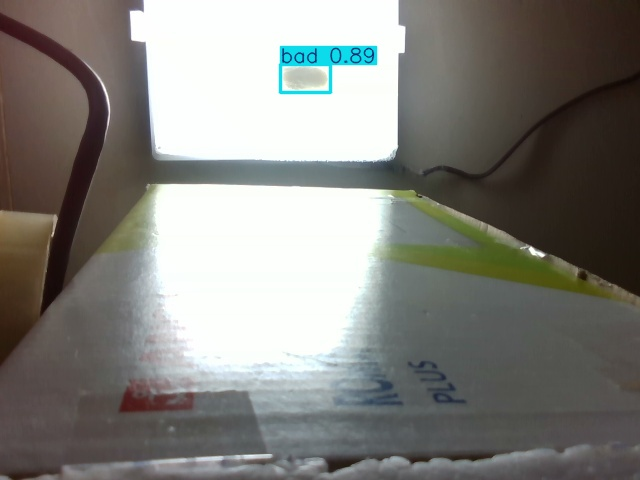


📸 New Image Detected: img_20251204_162939.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162939.jpg: 480x640 1 bad, 182.7ms
Speed: 5.1ms preprocess, 182.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


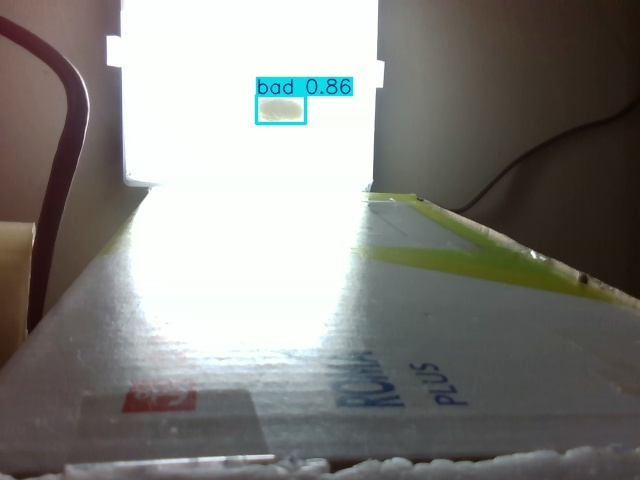


📸 New Image Detected: img_20251204_162949.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162949.jpg: 480x640 1 bad, 188.7ms
Speed: 4.5ms preprocess, 188.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


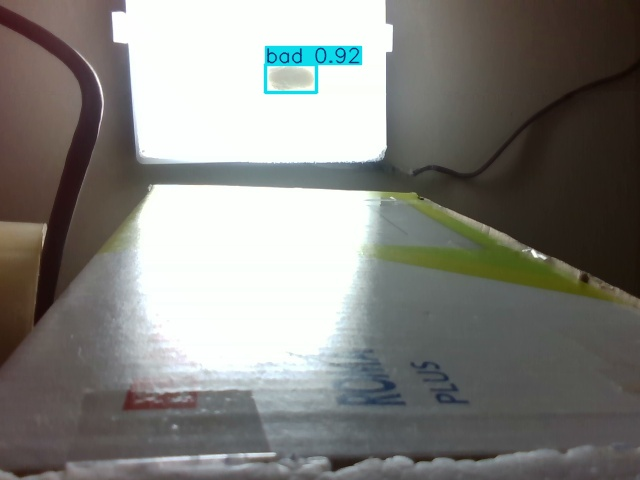


📸 New Image Detected: img_20251204_162958.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_162958.jpg: 480x640 1 bad, 188.6ms
Speed: 2.5ms preprocess, 188.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


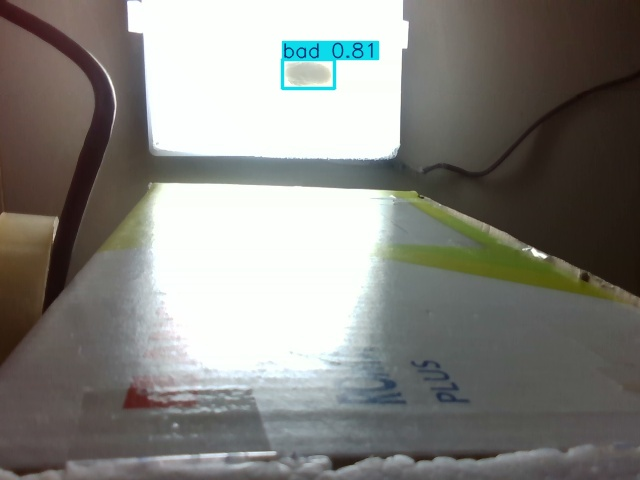


📸 New Image Detected: img_20251204_163006.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163006.jpg: 480x640 1 bad, 225.8ms
Speed: 6.6ms preprocess, 225.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


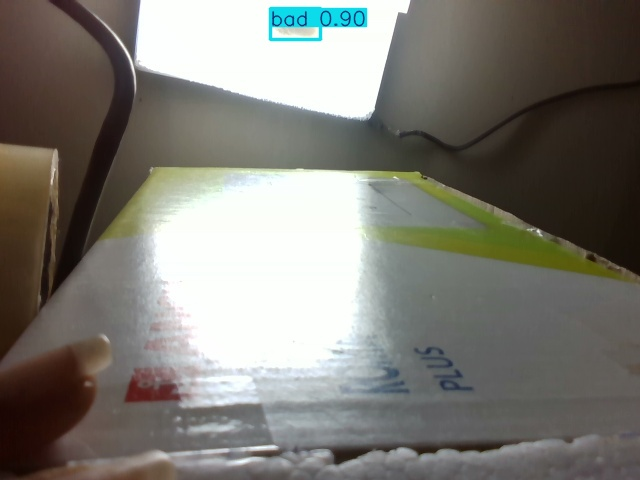


📸 New Image Detected: img_20251204_163014.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163014.jpg: 480x640 1 bad, 191.2ms
Speed: 2.4ms preprocess, 191.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


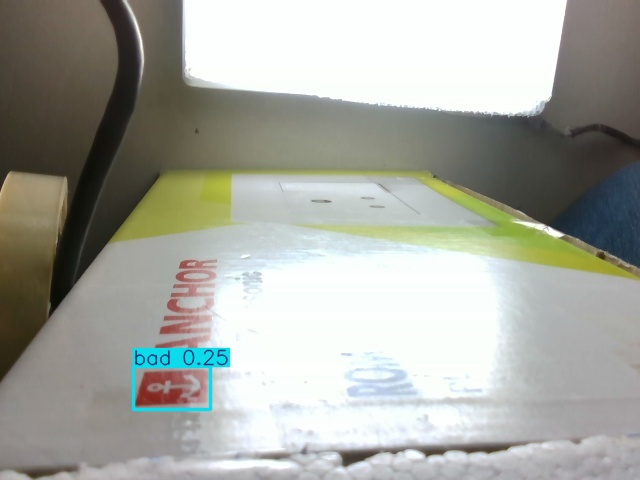


📸 New Image Detected: img_20251204_163022.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163022.jpg: 480x640 1 bad, 195.1ms
Speed: 4.9ms preprocess, 195.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


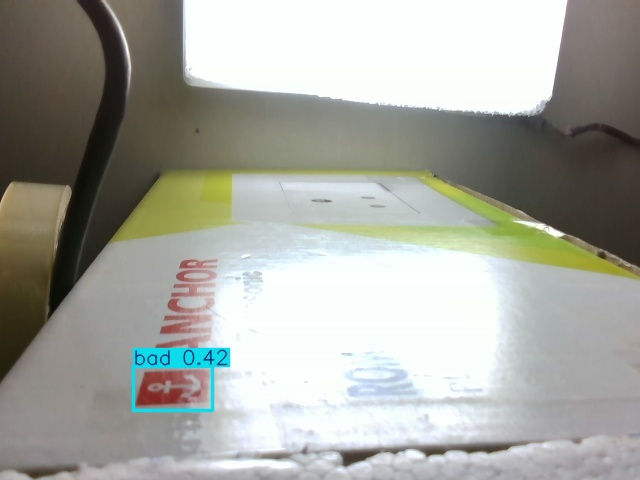


📸 New Image Detected: img_20251204_163030.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163030.jpg: 480x640 4 bads, 188.9ms
Speed: 2.4ms preprocess, 188.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


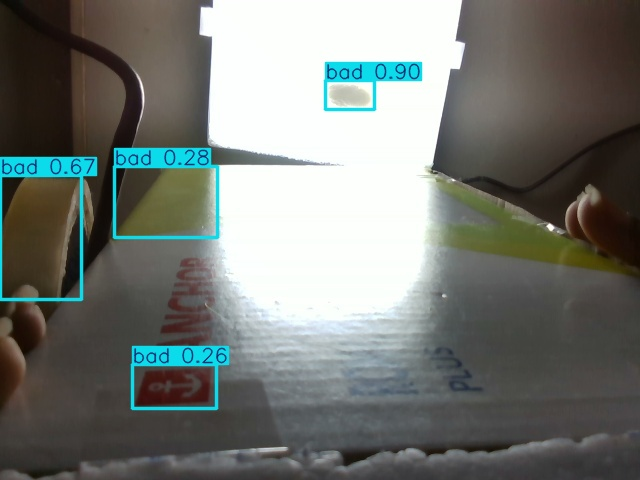


📸 New Image Detected: img_20251204_163038.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163038.jpg: 480x640 4 bads, 287.9ms
Speed: 4.1ms preprocess, 287.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


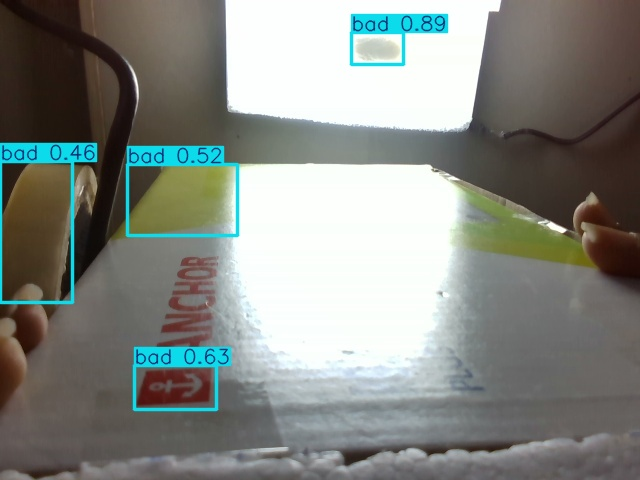


📸 New Image Detected: img_20251204_163047.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163047.jpg: 480x640 3 bads, 314.8ms
Speed: 3.2ms preprocess, 314.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


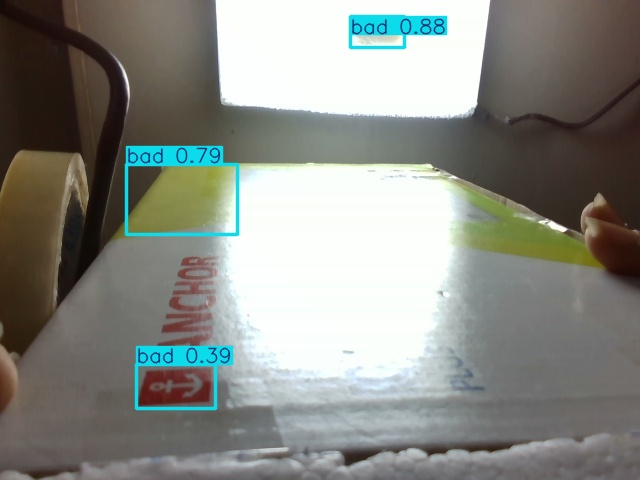


📸 New Image Detected: img_20251204_163055.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163055.jpg: 480x640 2 bads, 206.3ms
Speed: 4.7ms preprocess, 206.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


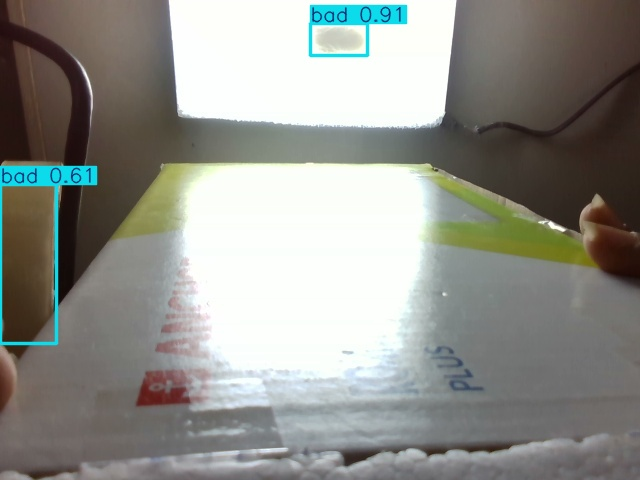


📸 New Image Detected: img_20251204_163103.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163103.jpg: 480x640 2 bads, 200.8ms
Speed: 4.5ms preprocess, 200.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


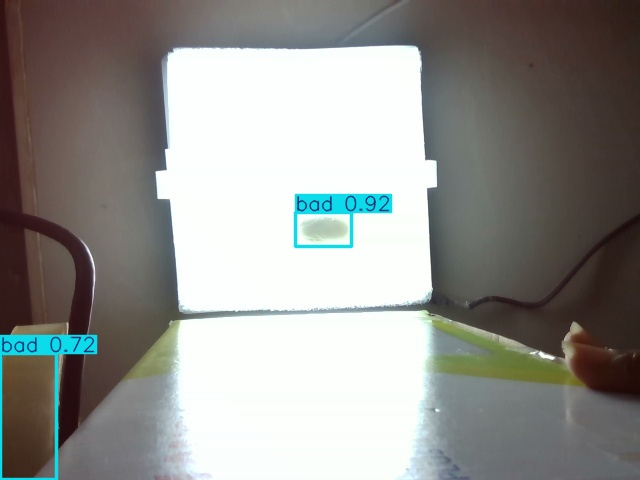


📸 New Image Detected: img_20251204_163111.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163111.jpg: 480x640 1 good, 1 bad, 201.9ms
Speed: 3.3ms preprocess, 201.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🟢 RESULT: GOOD COCOON
⚠️ Could not reach ESP32


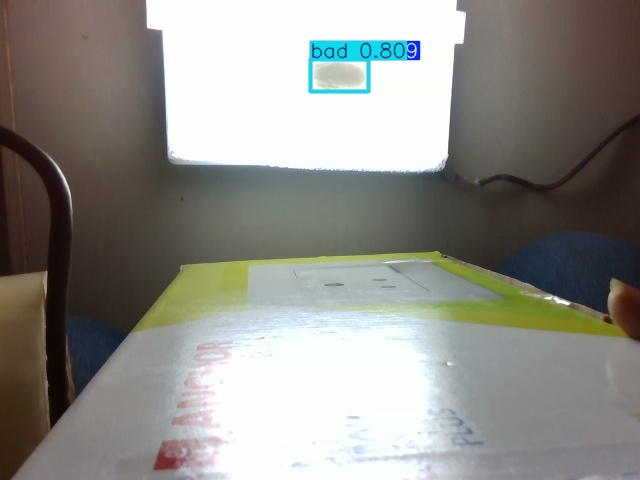


📸 New Image Detected: img_20251204_163120.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163120.jpg: 480x640 2 bads, 216.1ms
Speed: 4.4ms preprocess, 216.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


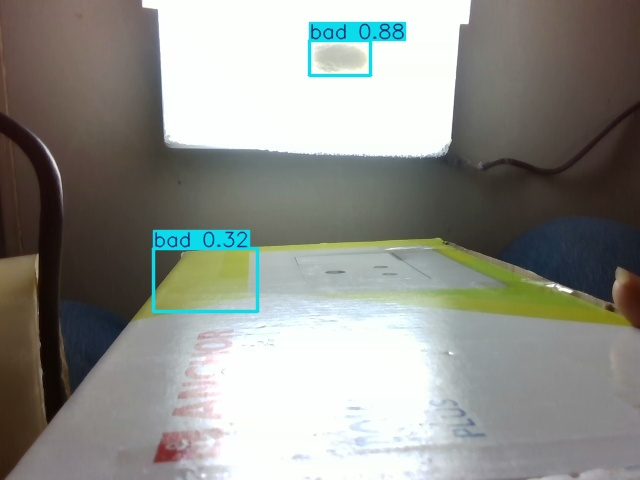


📸 New Image Detected: img_20251204_163128.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163128.jpg: 480x640 2 bads, 207.9ms
Speed: 4.5ms preprocess, 207.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


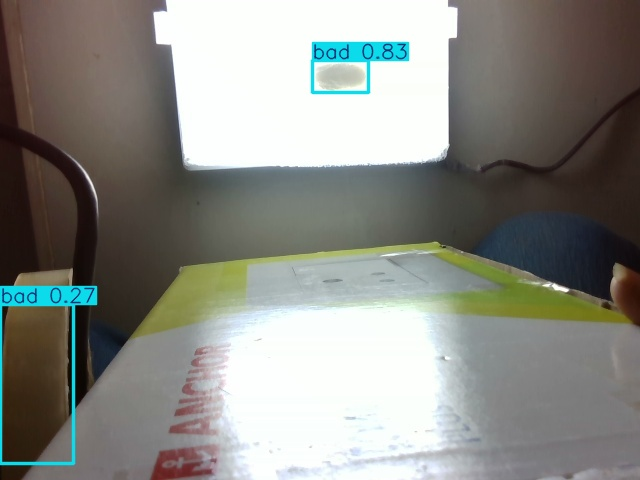


📸 New Image Detected: img_20251204_163137.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163137.jpg: 480x640 3 bads, 205.1ms
Speed: 2.5ms preprocess, 205.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


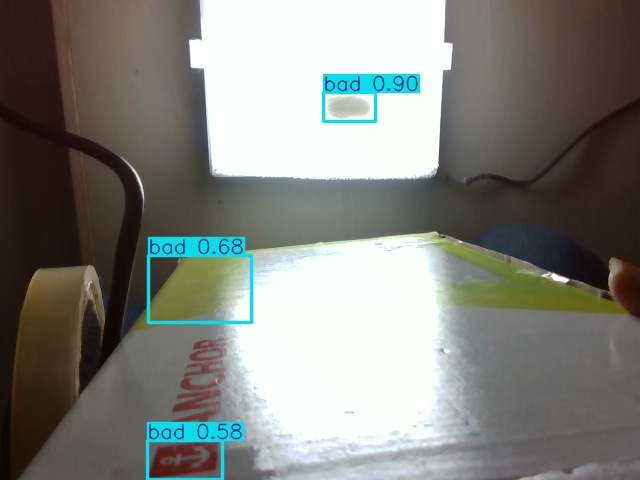


📸 New Image Detected: img_20251204_163145.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163145.jpg: 480x640 1 bad, 206.9ms
Speed: 4.0ms preprocess, 206.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


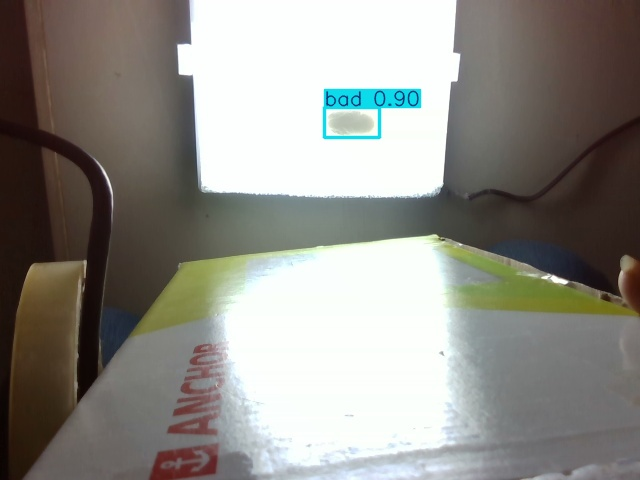


📸 New Image Detected: img_20251204_163153.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163153.jpg: 480x640 3 bads, 207.9ms
Speed: 2.4ms preprocess, 207.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


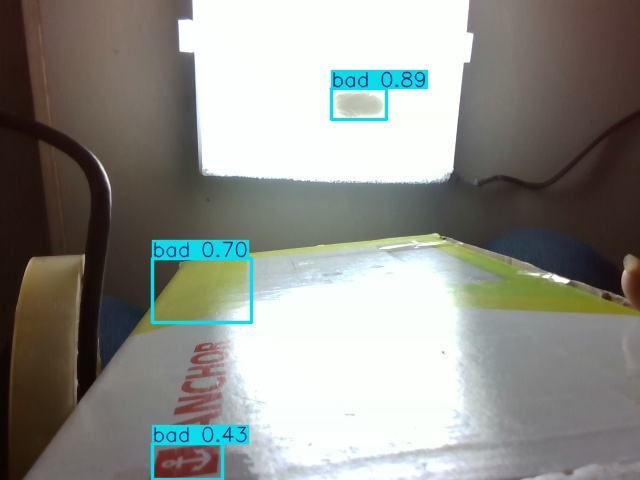


📸 New Image Detected: img_20251204_163201.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163201.jpg: 480x640 3 bads, 277.3ms
Speed: 4.5ms preprocess, 277.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


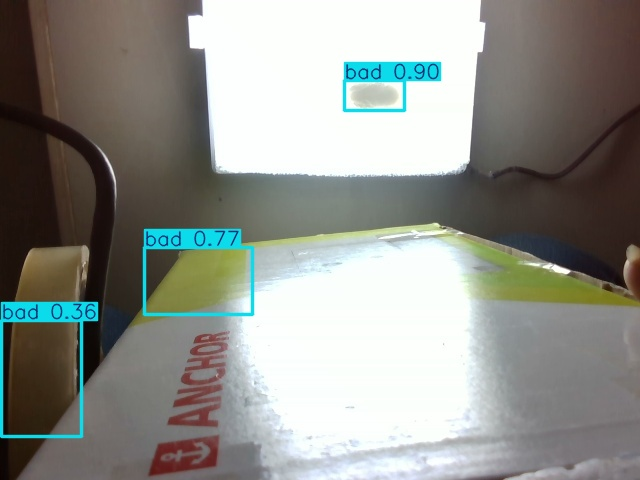


📸 New Image Detected: img_20251204_163211.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163211.jpg: 480x640 3 bads, 332.4ms
Speed: 3.8ms preprocess, 332.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


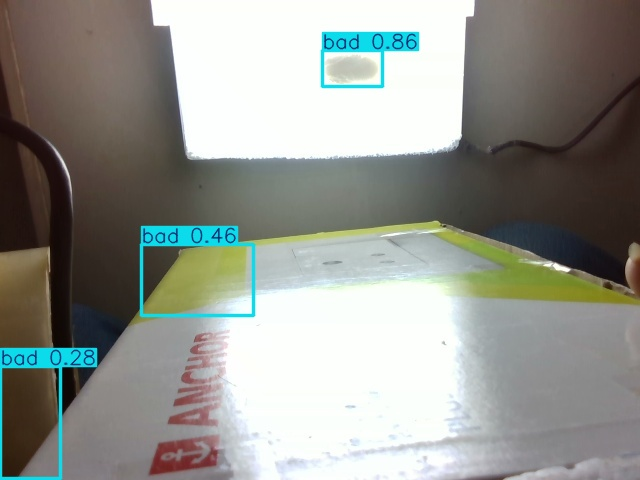


📸 New Image Detected: img_20251204_163219.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163219.jpg: 480x640 4 bads, 220.2ms
Speed: 2.4ms preprocess, 220.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


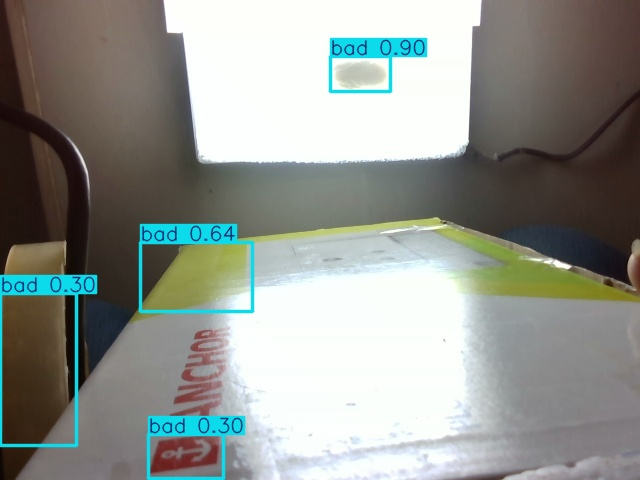


📸 New Image Detected: img_20251204_163228.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163228.jpg: 480x640 1 bad, 211.8ms
Speed: 3.0ms preprocess, 211.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


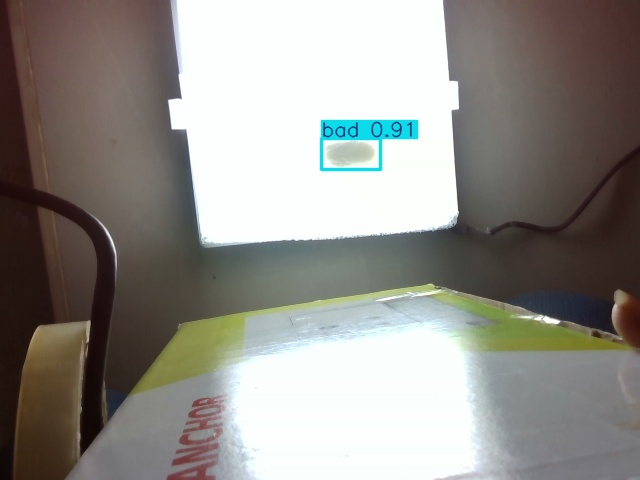


📸 New Image Detected: img_20251204_163235.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163235.jpg: 480x640 1 bad, 215.0ms
Speed: 4.4ms preprocess, 215.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


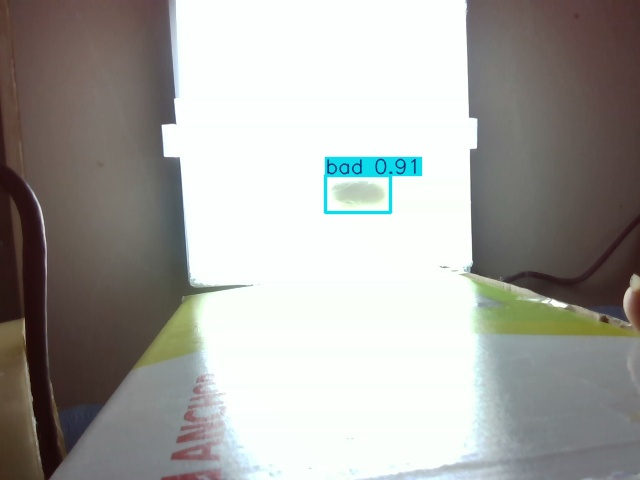


📸 New Image Detected: img_20251204_163243.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163243.jpg: 480x640 2 bads, 230.5ms
Speed: 2.6ms preprocess, 230.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


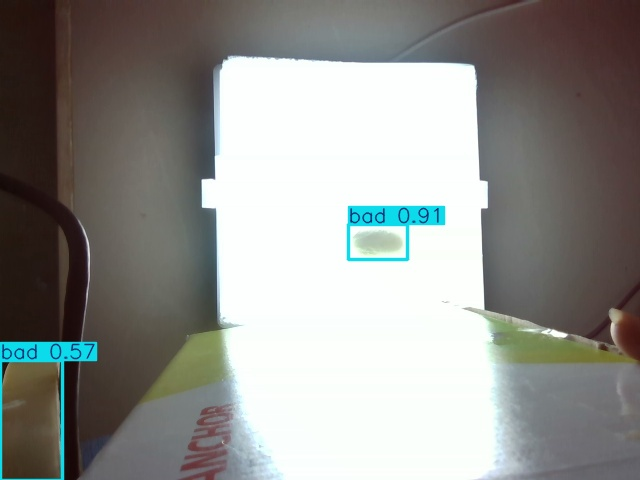


📸 New Image Detected: img_20251204_163252.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163252.jpg: 480x640 (no detections), 215.5ms
Speed: 2.5ms preprocess, 215.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


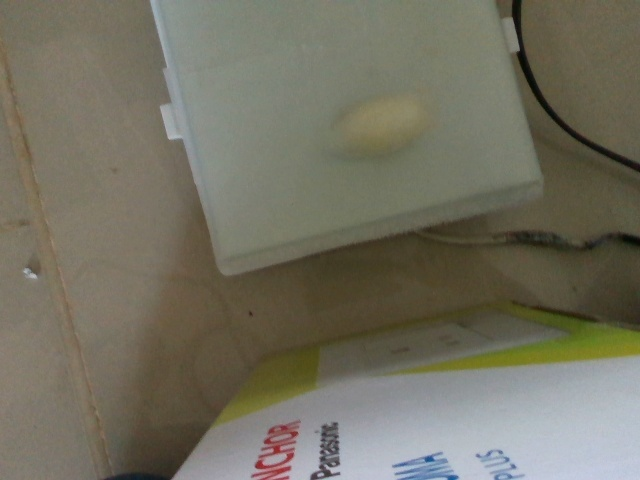


📸 New Image Detected: img_20251204_163300.jpg

image 1/1 /content/drive/MyDrive/CocoonImages/img_20251204_163300.jpg: 480x640 (no detections), 228.1ms
Speed: 4.8ms preprocess, 228.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
🔴 RESULT: BAD COCOON
⚠️ Could not reach ESP32


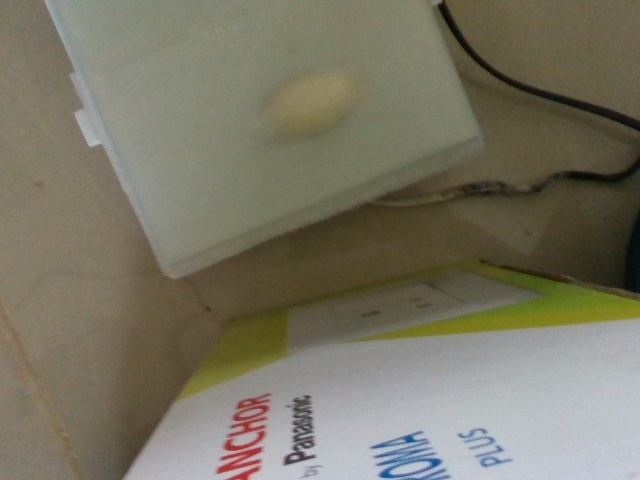

In [ ]:
import os
import time
import requests
from ultralytics import YOLO
from IPython.display import display, Image

# -------------------------------------------------------
# SETTINGS
# -------------------------------------------------------
model_path = "/content/drive/MyDrive/best_final_push.pt"
watch_folder = "/content/drive/MyDrive/CocoonImages"

# ESP32 IP ← CHANGE THIS
ESP_IP  = "http://10.168.57.167"   # Example hotspot IP

# Good/Bad servo endpoints
GOOD_URL = f"{ESP_IP}/servo?move=good"
BAD_URL  = f"{ESP_IP}/servo?move=bad"

# -------------------------------------------------------
# Load YOLO model
# -------------------------------------------------------
print("Loading model...")
model = YOLO(model_path)
print("Model loaded!")

processed = set()
print("Watching folder for new images...\n")

# -------------------------------------------------------
# MAIN LOOP
# -------------------------------------------------------
while True:
    try:
        files = sorted(os.listdir(watch_folder))

        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")) and f not in processed:
                full_path = os.path.join(watch_folder, f)

                print(f"\n📸 New Image Detected: {f}")

                # Run YOLO inference
                results = model(full_path)
                pred = results[0]

                names = model.names
                detected_classes = [names[int(box.cls)] for box in pred.boxes]

                # -------------------------------------------------------
                # DECISION
                # -------------------------------------------------------
                if "good" in detected_classes:
                    print("🟢 RESULT: GOOD COCOON")
                    try:
                        requests.get(GOOD_URL, timeout=1)
                        print("→ Servo moved to GOOD (45°)")
                    except:
                        print("⚠️ Could not reach ESP32")
                else:
                    print("🔴 RESULT: BAD COCOON")
                    try:
                        requests.get(BAD_URL, timeout=1)
                        print("→ Servo moved to BAD (135°)")
                    except:
                        print("⚠️ Could not reach ESP32")

                # Save annotated output
                out_path = "/content/output_" + f
                pred.plot(save=True, filename=out_path)

                display(Image(filename=out_path))

                processed.add(f)

        time.sleep(2)

    except KeyboardInterrupt:
        print("Stopped manually.")
        break

    except Exception as e:
        print("Error:", e)
        time.sleep(2)
